In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Zomato_df.csv') 

In [4]:
data

,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,1,0,4.1,787,1,20,594,800.0,5047
2,2,1,0,3.8,918,1,16,484,800.0,5047
3,3,0,0,3.7,88,1,62,1587,300.0,5047
4,4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...,...
23243,23243,1,1,3.8,128,84,5,1318,1200.0,5047
23244,23244,0,0,3.9,77,84,38,878,2000.0,5047
23245,23245,0,0,2.8,161,84,21,539,1200.0,5047
23246,23246,0,0,2.5,81,84,21,80,800.0,5047


In [5]:
data.shape

(23248, 10)

In [6]:
data.columns

Index(['Unnamed: 0', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'menu_item'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    23248 non-null  int64  
 1   online_order  23248 non-null  int64  
 2   book_table    23248 non-null  int64  
 3   rate          23248 non-null  float64
 4   votes         23248 non-null  int64  
 5   location      23248 non-null  int64  
 6   rest_type     23248 non-null  int64  
 7   cuisines      23248 non-null  int64  
 8   cost          23248 non-null  float64
 9   menu_item     23248 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.8 MB


In [8]:
  data.isnull().sum()

Unnamed: 0      0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
menu_item       0
dtype: int64

In [12]:
data.head()

,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,1,0,4.1,787,1,20,594,800.0,5047
2,2,1,0,3.8,918,1,16,484,800.0,5047
3,3,0,0,3.7,88,1,62,1587,300.0,5047
4,4,0,0,3.8,166,4,20,1406,600.0,5047


In [17]:
data.dropna(inplace = True)


In [18]:
data.isnull().sum()


Unnamed: 0      0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
menu_item       0
dtype: int64

In [19]:
data.duplicated().sum()


0

In [20]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [21]:
data = data.rename(columns = {'approx_cost(for two people)':'cost',
                         'listed_in(type)':'type', 'listed_in(city)': 'city'})


In [22]:
data.head() 


,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,1,0,4.1,787,1,20,594,800.0,5047
2,2,1,0,3.8,918,1,16,484,800.0,5047
3,3,0,0,3.7,88,1,62,1587,300.0,5047
4,4,0,0,3.8,166,4,20,1406,600.0,5047


In [23]:
data['cost'].unique()


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1350.,
       2200., 1400., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [27]:
data['rate'].unique() 


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [30]:
data['rate'] = data['rate'].apply(lambda x: float(x))
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

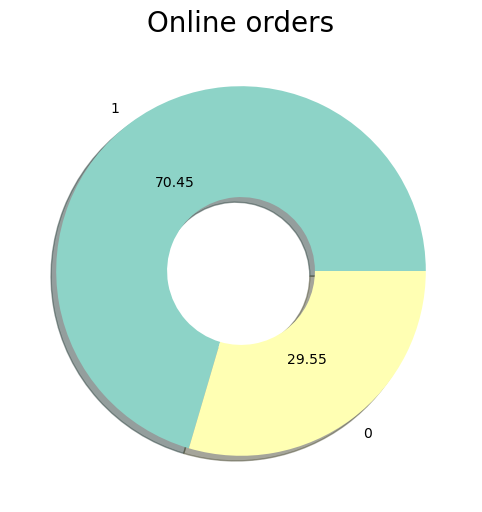

In [37]:
v = data['online_order'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Online orders', fontsize = 20)
plt.show()

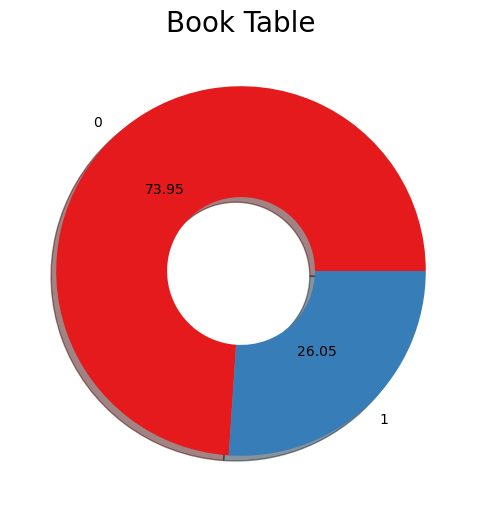

In [38]:
v = data['book_table'].value_counts()

fig = plt.gcf()
fig.set_size_inches((8,6))
cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Book Table', fontsize = 20)
plt.show() 

Text(0.5, 1.0, 'Rating Distribution')

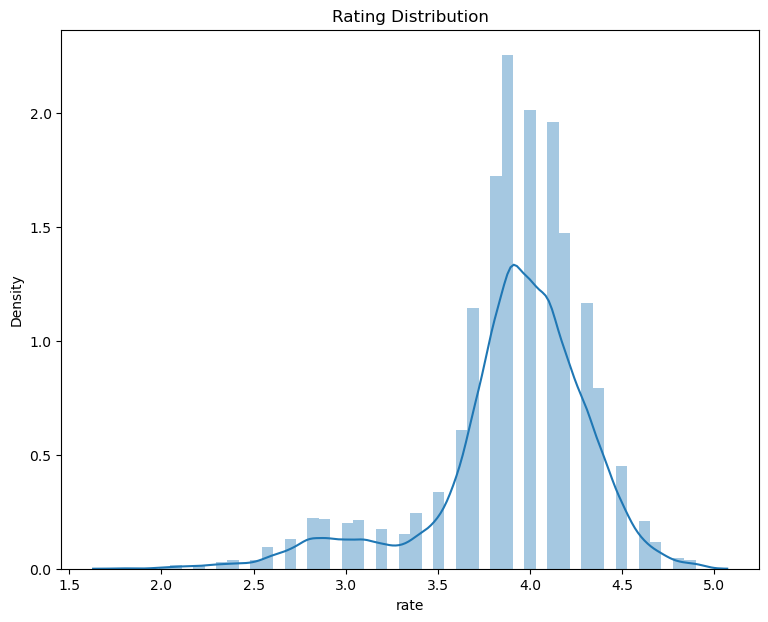

In [40]:
plt.figure(figsize = (9,7))
sns.distplot(data['rate'])
plt.title('Rating Distribution')

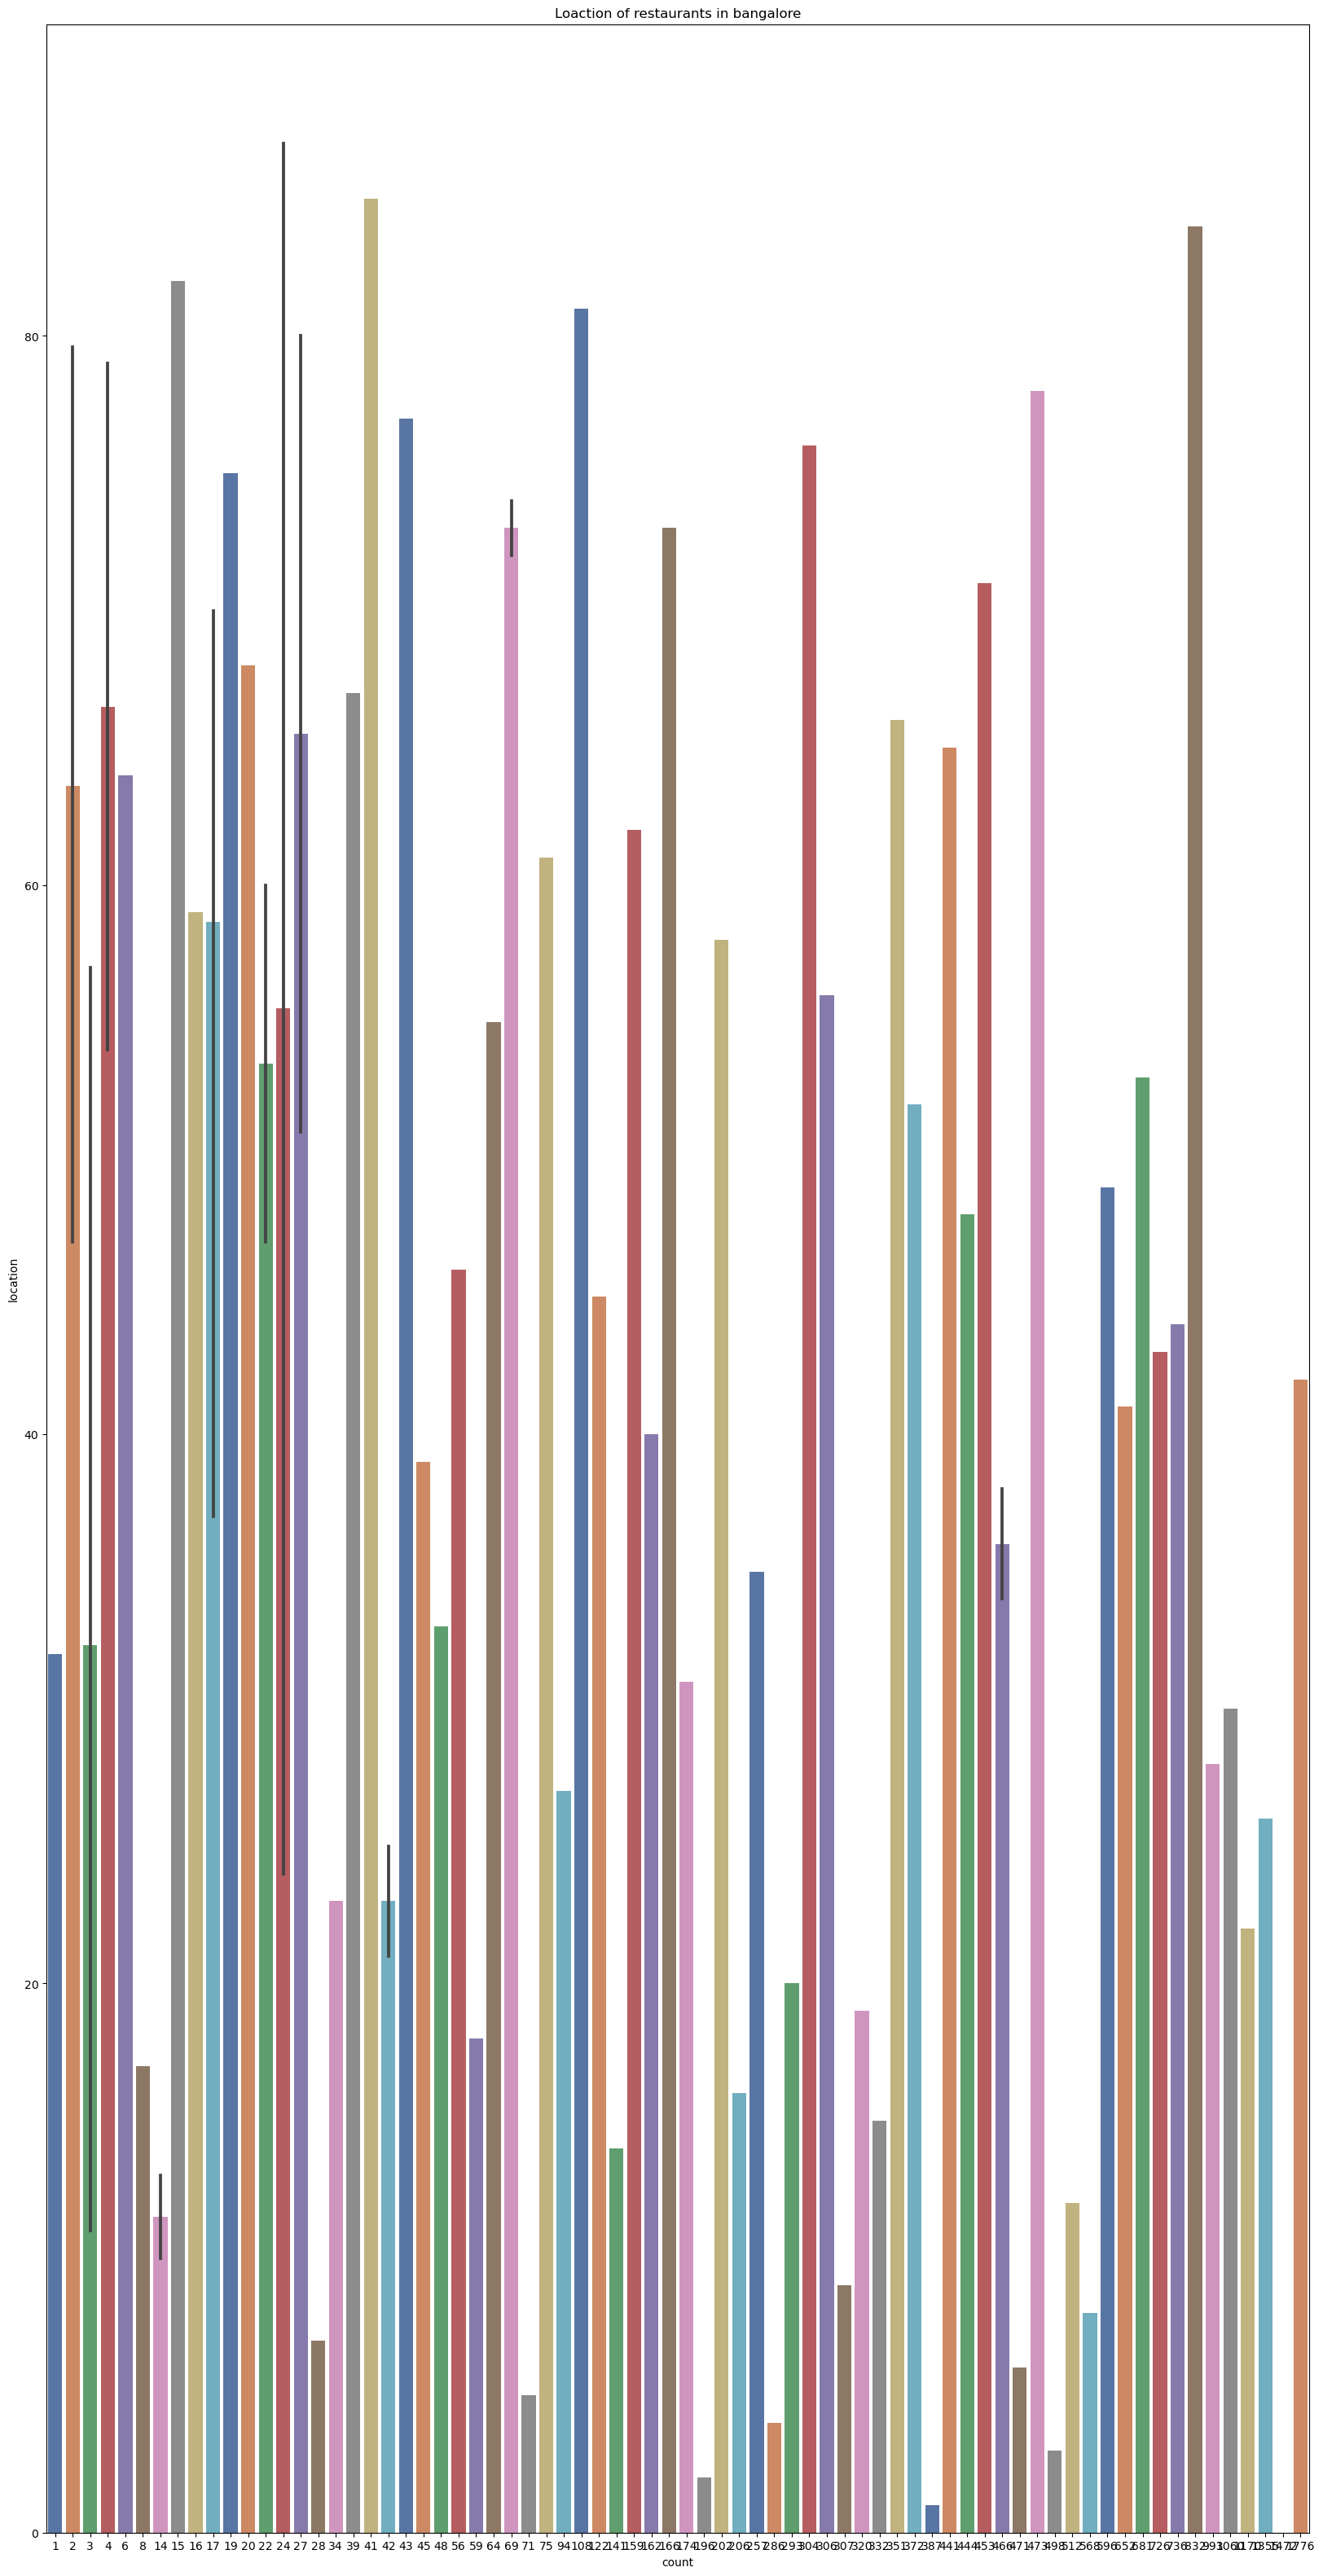

In [41]:
plt.figure(figsize=  (20,40))
chains = data['location'].value_counts()#[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Loaction of restaurants in bangalore')
plt.show() 

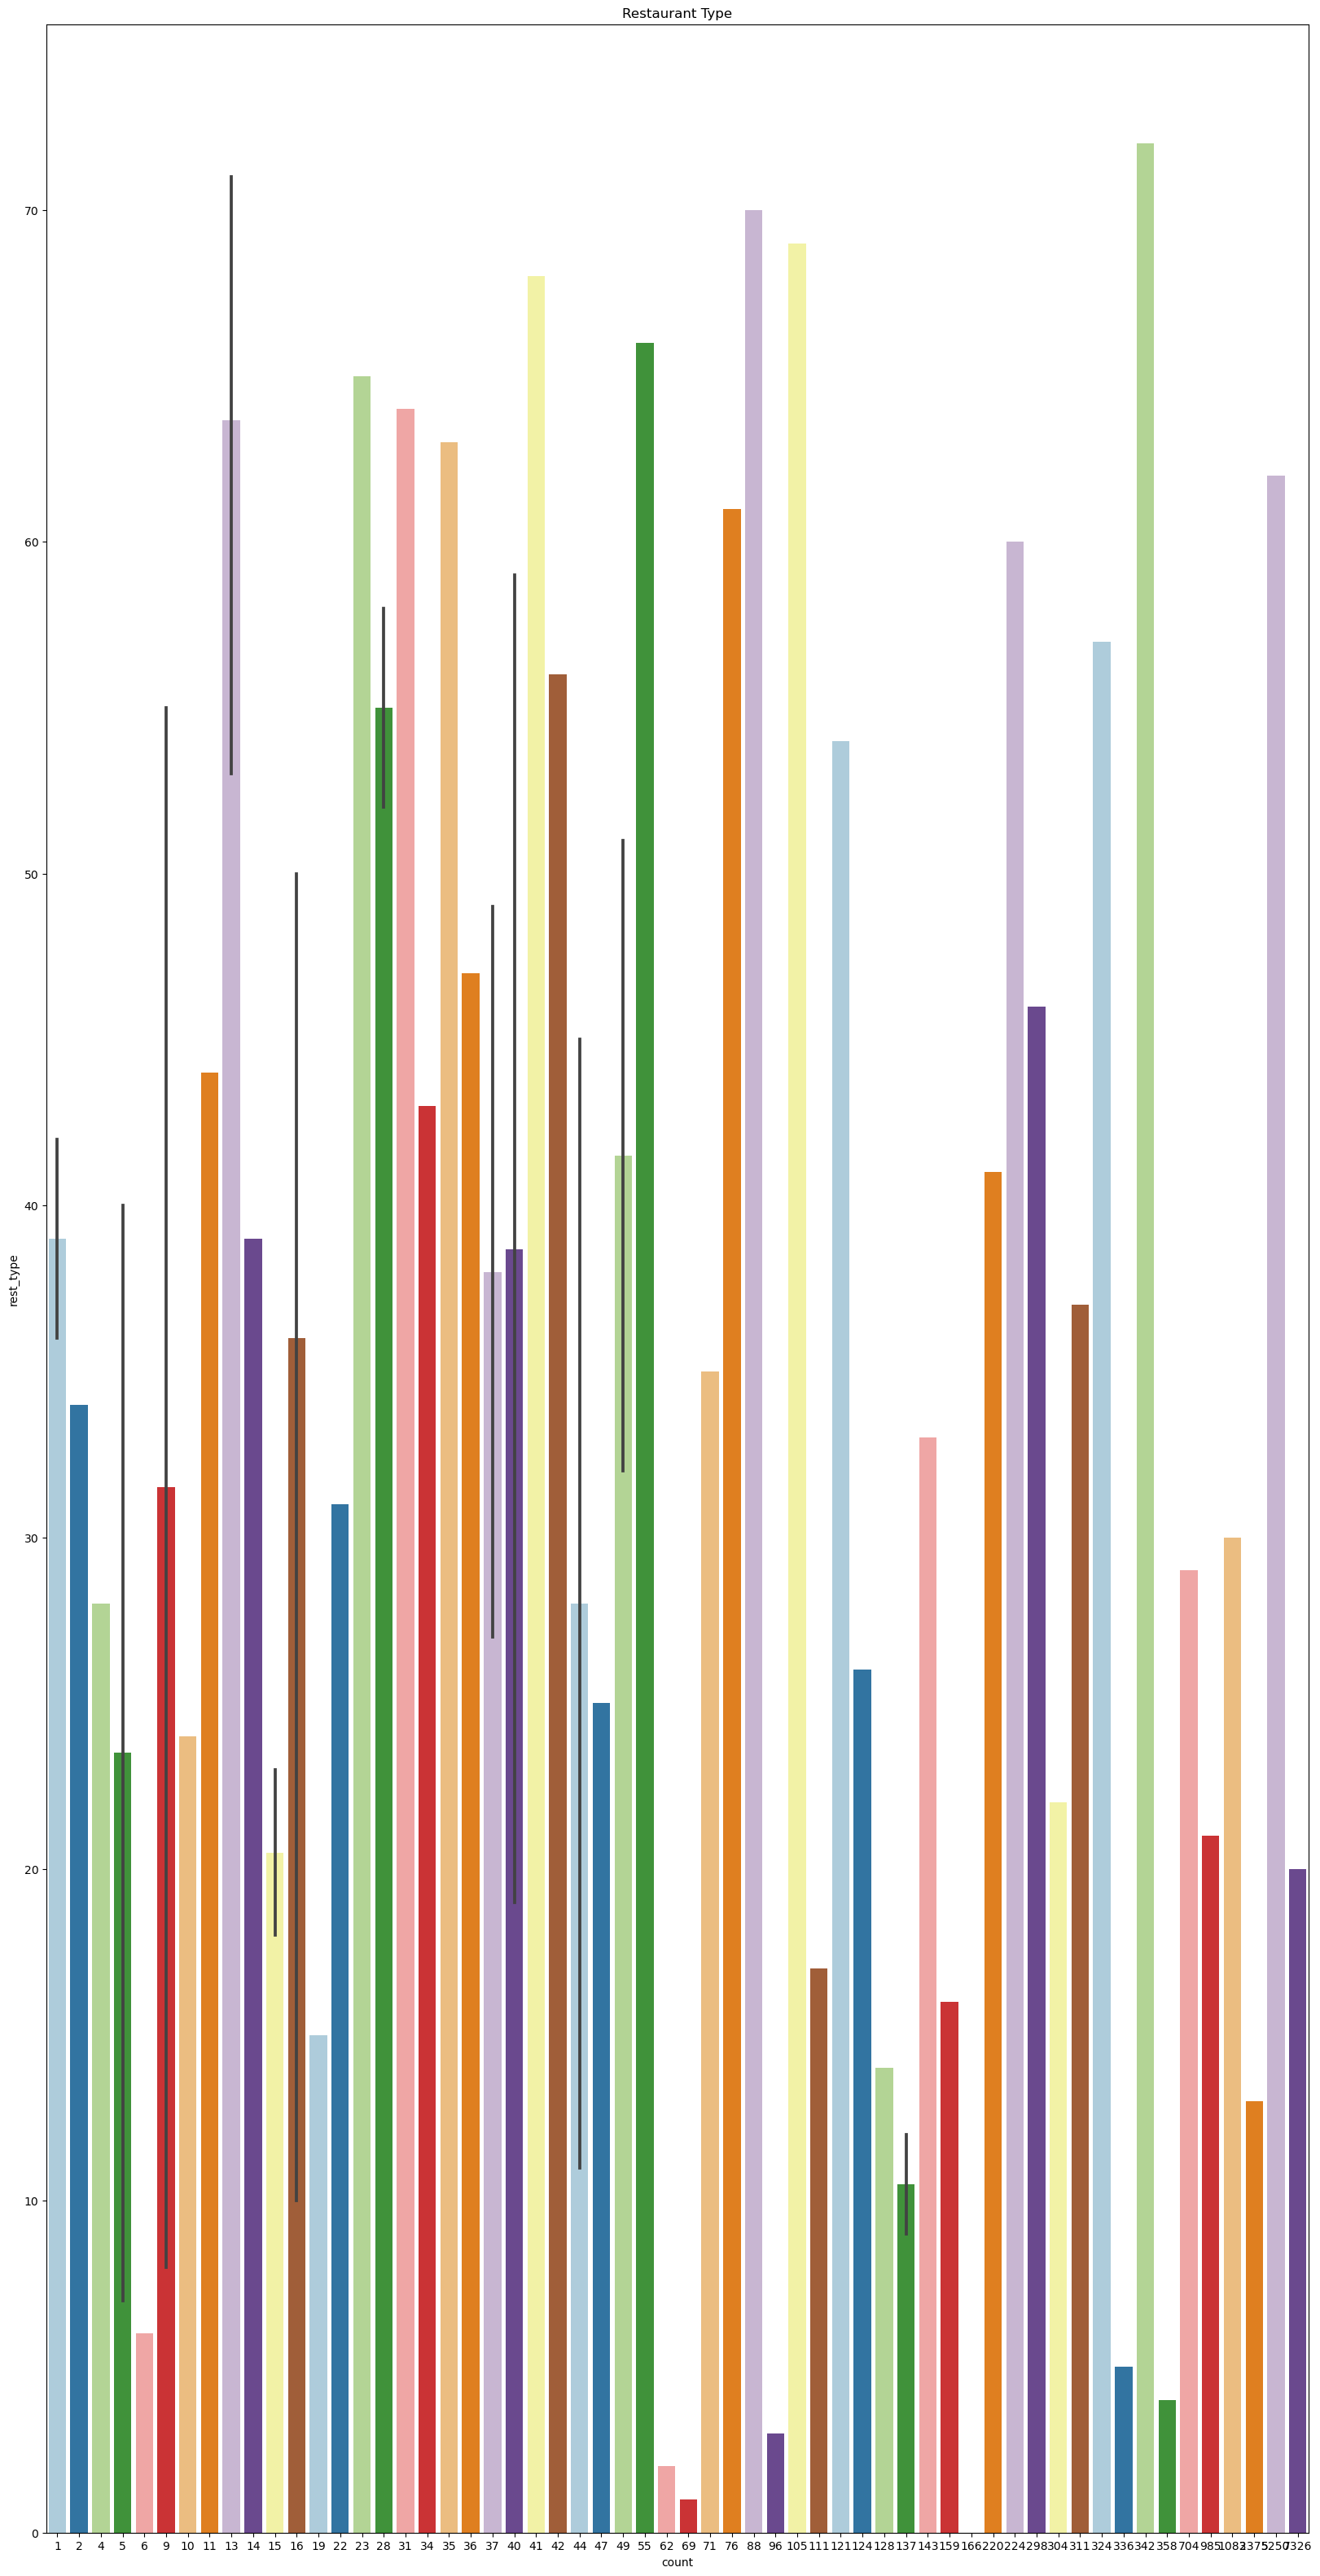

In [42]:
plt.figure(figsize = (20,40))
t = data['rest_type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()
plt.show()

In [46]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30) 

Series([], Name: count, dtype: int64)

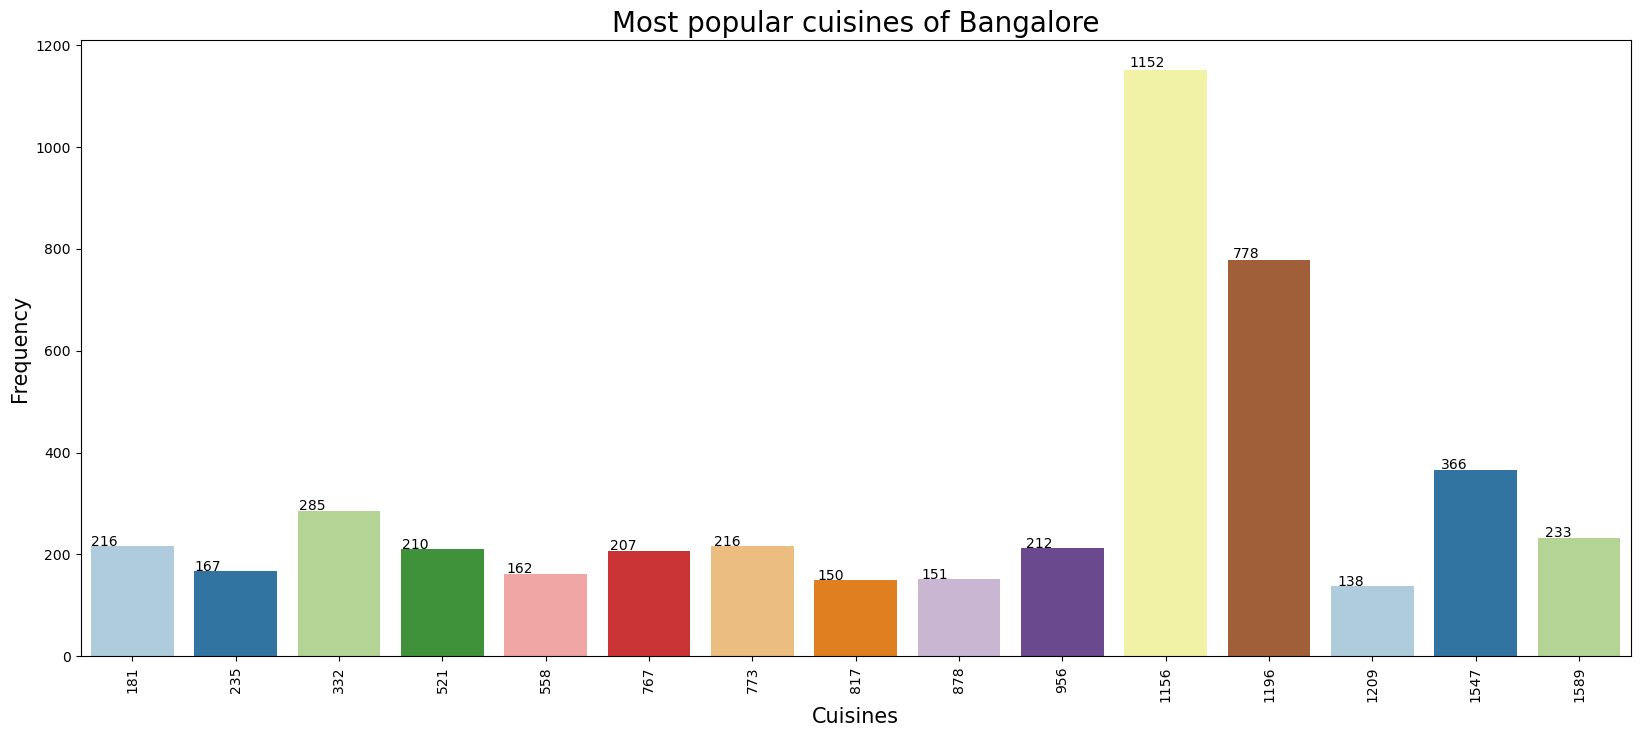

In [49]:
v = data['cuisines'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()*1.005, i.get_height()*1.005))


plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

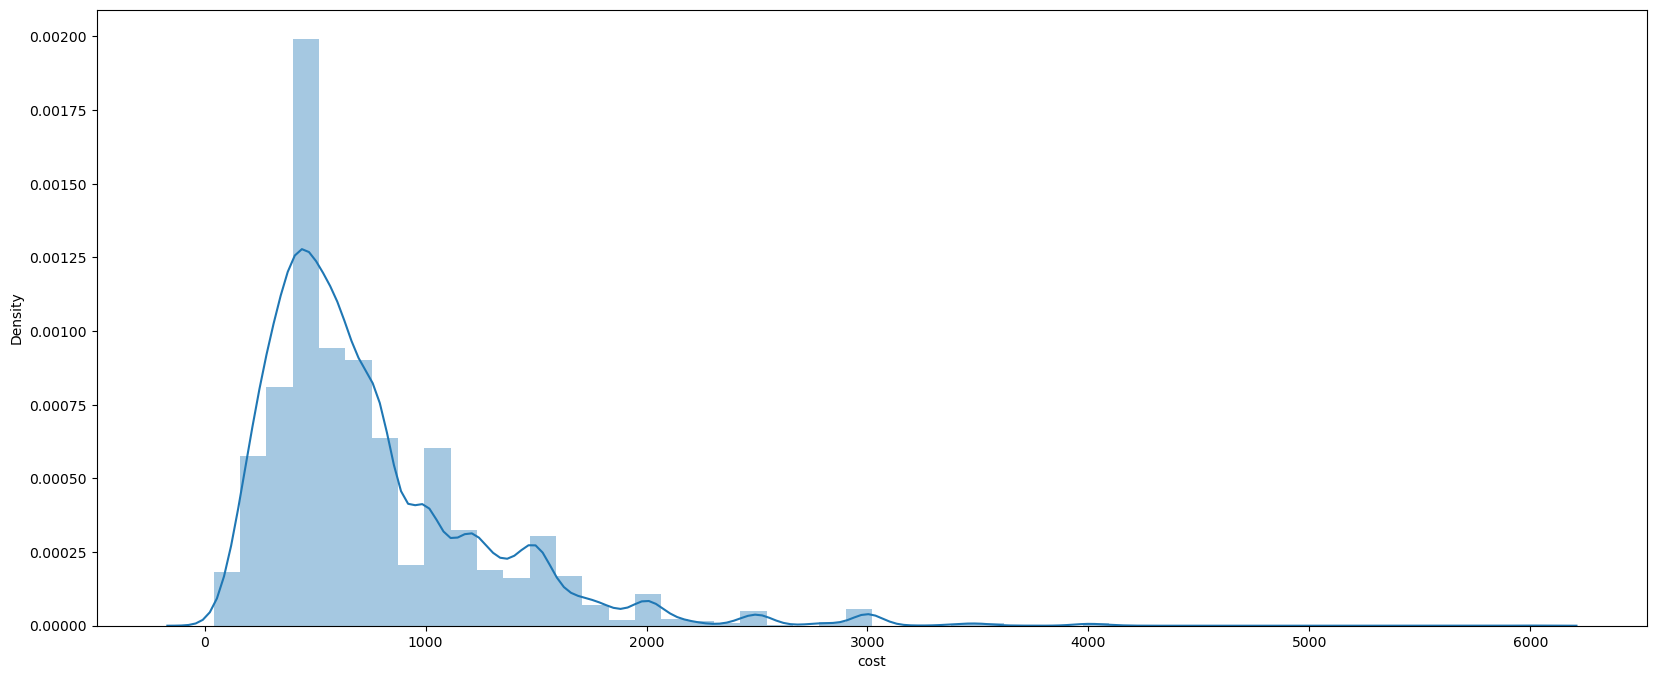

In [51]:
plt.figure(figsize=(20,8))
sns.distplot(data['cost'])
plt.show()

In [52]:
data.columns 

Index(['Unnamed: 0', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'menu_item'],
      dtype='object')

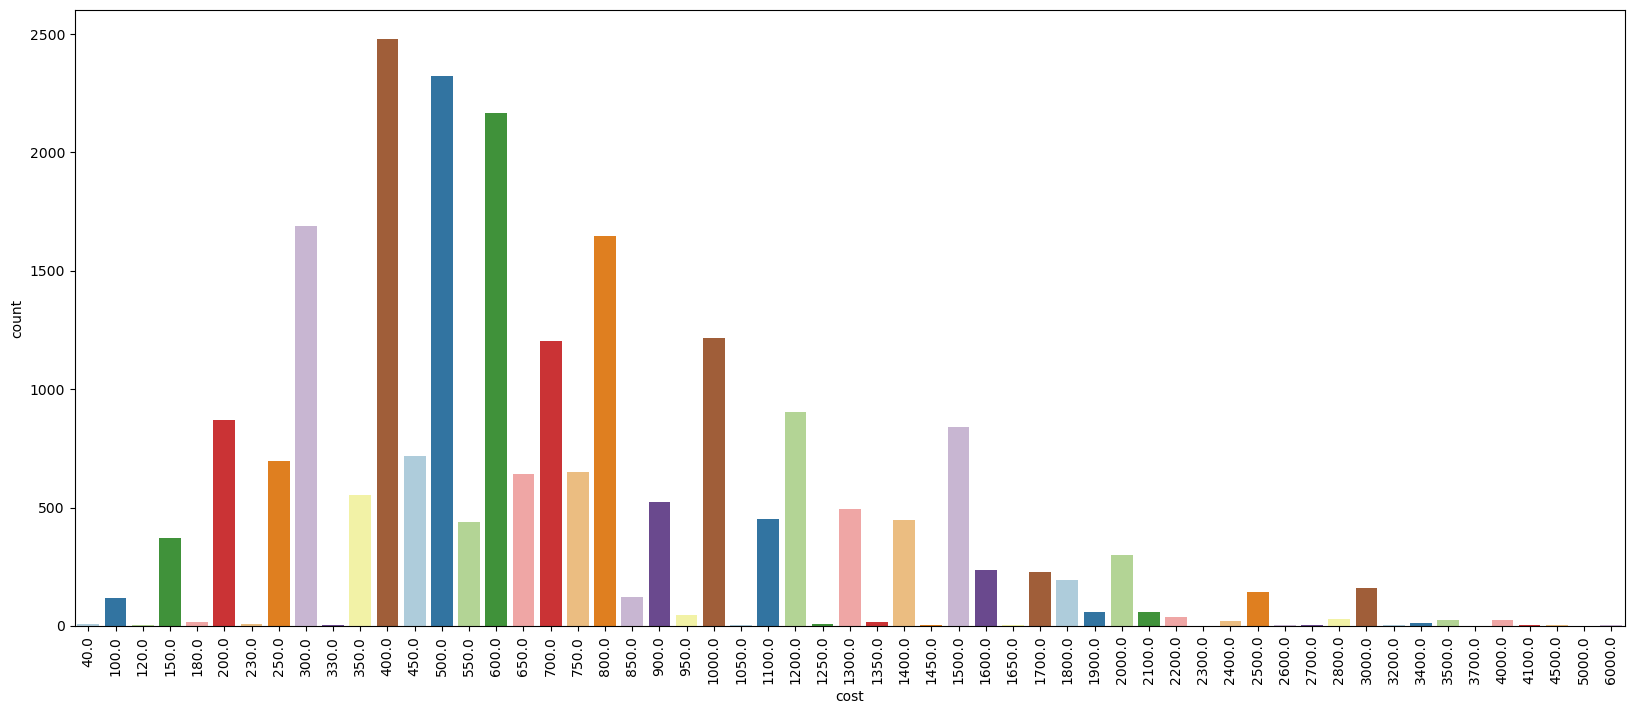

In [53]:
v = data['cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

In [57]:
data.head()


,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,1,0,4.1,787,1,20,594,800.0,5047
2,2,1,0,3.8,918,1,16,484,800.0,5047
3,3,0,0,3.7,88,1,62,1587,300.0,5047
4,4,0,0,3.8,166,4,20,1406,600.0,5047


In [58]:
data.online_order[data.online_order == 'Yes'] = 1
data.online_order[data.online_order == 'No'] =  0 

In [59]:
data.online_order.value_counts() 

online_order
1    16378
0     6870
Name: count, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.location = le.fit_transform(data.location)
data.rest_type = le.fit_transform(data.rest_type)
data.cuisines = le.fit_transform(data.cuisines)
data.menu_item = le.fit_transform(data.menu_item)

data.book_table = le.fit_transform(data.book_table) 

In [61]:
data.head(n=2)


,Unnamed: 0,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,1,0,4.1,787,1,20,594,800.0,5047
